In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

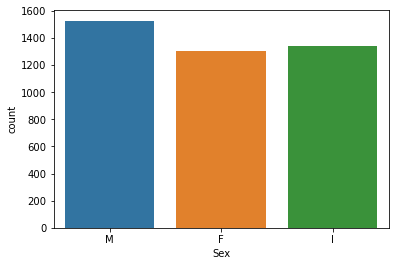

In [8]:
sns.countplot(x='Sex',data=df)
plt.show()

# encoding of dataframe:

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab_enc=LabelEncoder()

In [11]:
df1=lab_enc.fit_transform(df['Sex'])

In [12]:
df1

array([2, 2, 0, ..., 2, 0, 2])

In [13]:
df['Sex']=df1
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [15]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


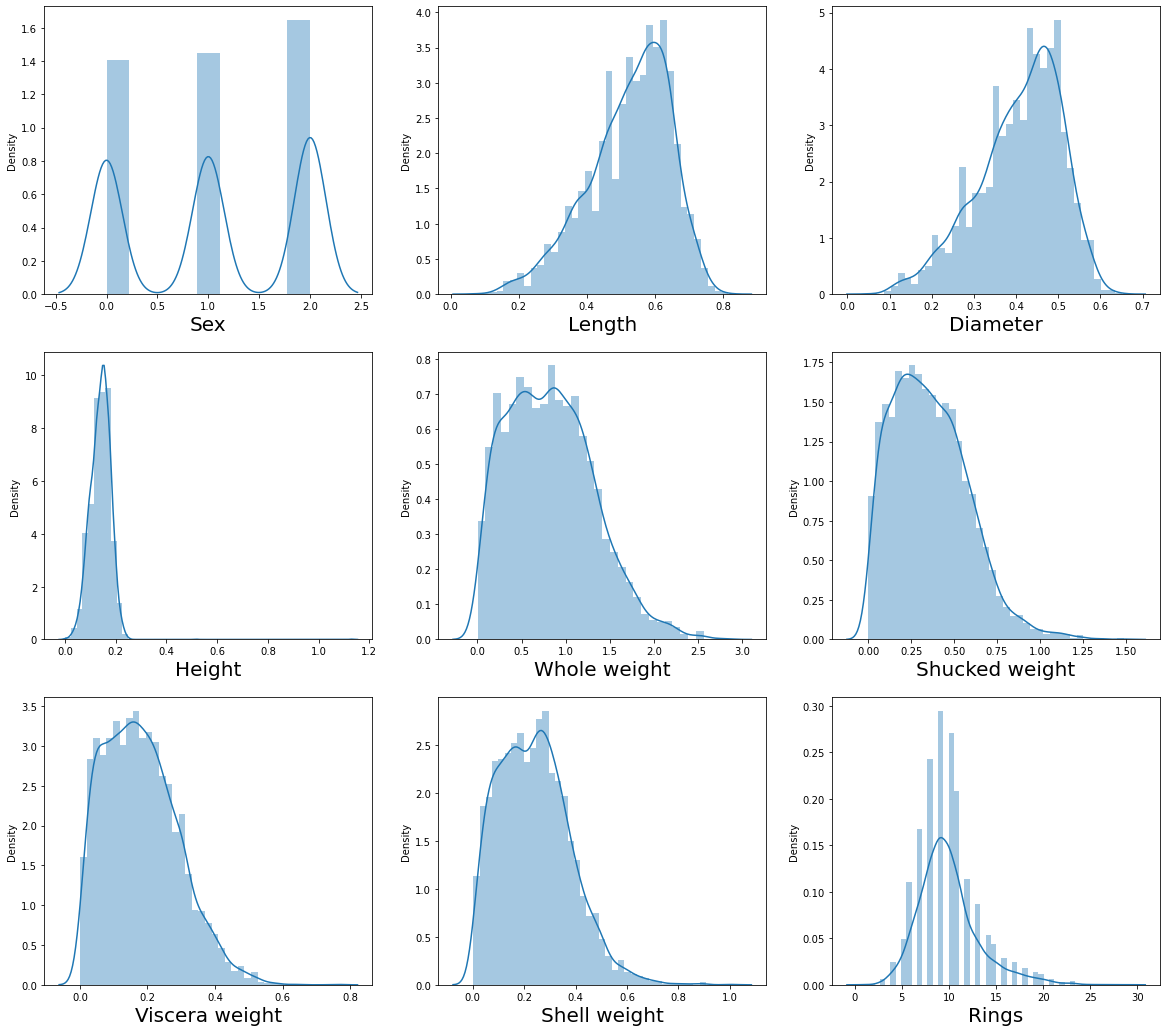

In [16]:
plt.figure(figsize=(20,18))
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.show()

In [17]:
df['Height'].mean()

0.1395163993296614

# plotting the heatmap:

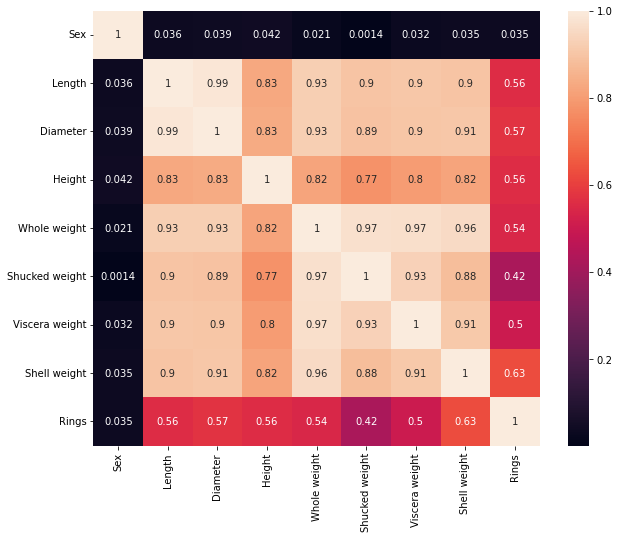

In [18]:
df_corr=df.corr().abs()

plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

seems Length and Diameter are correlated.Let's check with scatter plot:

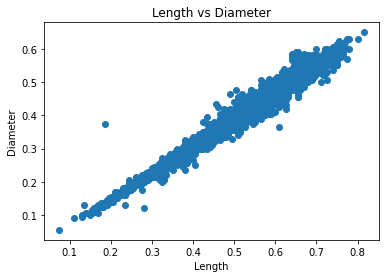

In [19]:
plt.scatter(df.Length,df.Diameter)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Length vs Diameter')
plt.show()

here , we can see that multiple columns are highly correlated with each other . But we need some more proof for the multicollinearity. So , we are going to check the variance inflation factor

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
x=df.drop(columns=['Rings'])
y=df['Rings']

In [22]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [23]:
x_scaled.shape[1]

8

In [24]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features']=x.columns

vif

,vif,features
0,1.010580,Sex
1,40.771963,Length
2,41.858341,Diameter
3,3.560886,Height
4,109.593589,Whole weight
5,28.434776,Shucked weight
6,17.367103,Viscera weight
7,21.258423,Shell weight


here , is the another proof of multicollinearity problem exists. since the featues like Length,Diameter,Whole weight, Shucked weight, Viscera weight and Shell weight . All are highly correlated with each other and having value more than 5 have been observed while using Variance inflation factor. so , we are going to delete "Length" as it is showing the same trend as "Diameter" but it has the less correlation with the target variable with respect to"Diameter".

# checking for the outliers in the feature columns:

In [25]:
df_features=df.drop(['Rings','Length'],axis=1)

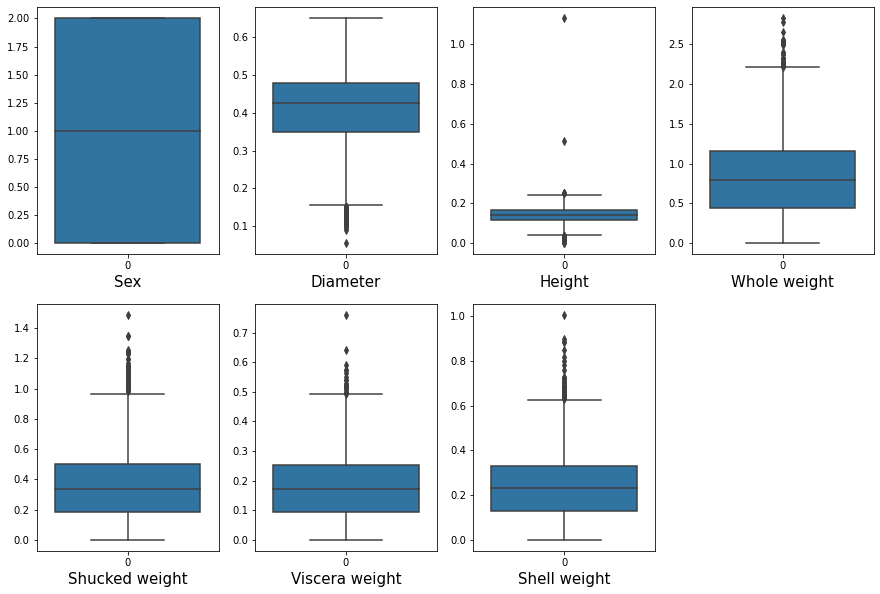

In [26]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in df_features:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
        
        plotnumber+=1
plt.show()

we can see here, outliers are present in the multiple columns. So, we are going to handle this

In [27]:
df.shape

(4177, 9)

In [28]:
df1=df.drop(['Length'],axis=1)
df1.head()

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
df1.shape

(4177, 8)

find the iqr to identify to identify the outliers:

In [30]:
# 1st quantile

q1=df1.quantile(0.25)

In [31]:
# 3rd quantile

q3=df1.quantile(0.75)

In [32]:
# IQR

iqr=q3-q1

# validating outliers:

In [33]:
dia_low=(q1.Diameter-(1.5*iqr.Diameter))
print(dia_low)

index=np.where(df1['Diameter']<dia_low)

df1=df1.drop(df1.index[index])
print(df1.shape)

df1.reset_index()

0.15499999999999997
(4118, 8)


,index,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4113,4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4114,4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4115,4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4116,4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [34]:
height_low=(q1.Height-(1.5*iqr.Height))
print(height_low)

index=np.where(df1['Height']<height_low)

df1=df1.drop(df1.index[index])
print(df1.shape)

df1.reset_index()

0.039999999999999994
(4115, 8)


,index,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4110,4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4111,4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4112,4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4113,4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [35]:
height_high=(q3.Height+(1.5*iqr.Height))
print(height_high)

index=np.where(df1['Height']>height_high)

df1=df1.drop(df1.index[index])
print(df1.shape)

df1.reset_index()

0.24000000000000002
(4110, 8)


,index,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4105,4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4106,4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4107,4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4108,4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
iqr1 = df1['Shell weight'].quantile(0.75) - df1['Shell weight'].quantile(0.25)
shell_high=(df1['Shell weight'].quantile(0.75)+(1.5*iqr1))
print(shell_high)

index=np.where(df1['Shell weight']>shell_high)

df1=df1.drop(df1.index[index])
print(df1.shape)

df1.reset_index()

0.6230625000000001
(4073, 8)


,index,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4068,4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4069,4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4070,4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4071,4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [37]:
iqr2 = df1['Viscera weight'].quantile(0.75) - df1['Viscera weight'].quantile(0.25)
vis_high=(df1['Viscera weight'].quantile(0.75)+(1.5*iqr2))
print(vis_high)

index=np.where(df1['Viscera weight']>vis_high)

df1=df1.drop(df1.index[index])
print(df1.shape)

df1.reset_index()

0.48225
(4045, 8)


,index,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4040,4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4041,4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4042,4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4043,4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [38]:
iqr3 = df1['Whole weight'].quantile(0.75) - df1['Whole weight'].quantile(0.25)
whole_high=(df1['Whole weight'].quantile(0.75)+(1.5*iqr3))
print(whole_high)

index=np.where(df1['Whole weight']>whole_high)

df1=df1.drop(df1.index[index])
print(df1.shape)

df1.reset_index()

2.1732500000000003
(4035, 8)


,index,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4030,4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4031,4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4032,4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4033,4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [39]:
iqr4 = df1['Shucked weight'].quantile(0.75) - df1['Shucked weight'].quantile(0.25)
shuck_high=(df1['Shucked weight'].quantile(0.75)+(1.5*iqr4))
print(shuck_high)

index=np.where(df1['Shucked weight']>shuck_high)

df1=df1.drop(df1.index[index])
print(df1.shape)

df1.reset_index()

0.9532499999999999
(4015, 8)


,index,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4010,4172,0,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4011,4173,2,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4012,4174,2,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4013,4175,0,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
df1.shape

(4015, 8)

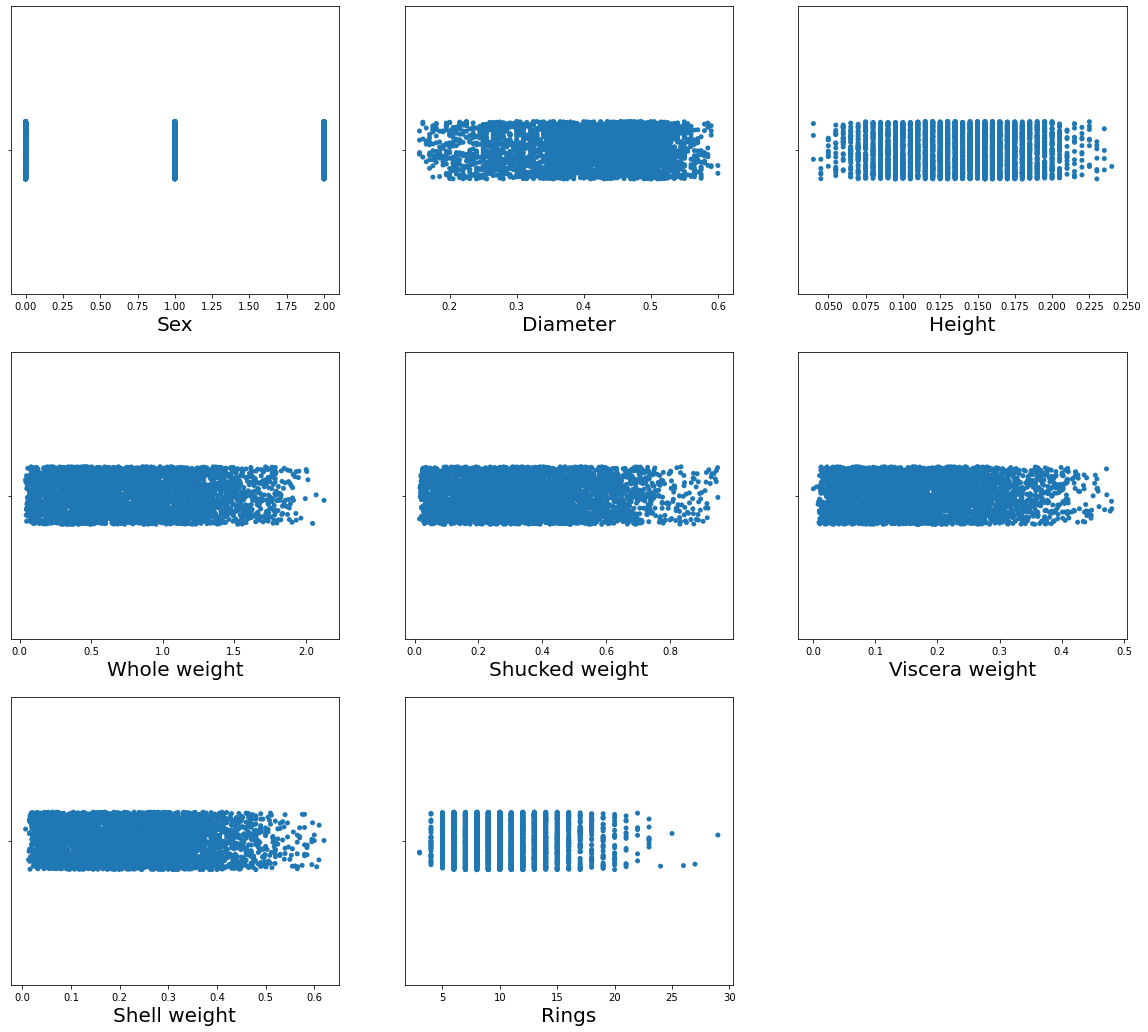

In [41]:
plt.figure(figsize=(20,18))
plotnumber=1

for column in df1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.show()

In [42]:
from sklearn.metrics import r2_score

In [43]:
df1.head()

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [44]:
x=df1.drop(['Rings'],axis=1)
y=df1['Rings']

In [45]:
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state{i} , the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"at random state{i} , the testing accuracy is:-{r2_score(y_test,pred_test)}")

at random state0 , the training accuracy is:-0.5043508321822067
at random state0 , the testing accuracy is:-0.5257881819099502
at random state1 , the training accuracy is:-0.5142123019603013
at random state1 , the testing accuracy is:-0.497642909190388
at random state2 , the training accuracy is:-0.5224153281857968
at random state2 , the testing accuracy is:-0.46699042976057414
at random state3 , the training accuracy is:-0.5105684035878689
at random state3 , the testing accuracy is:-0.5134845347494509
at random state4 , the training accuracy is:-0.5126046716853587
at random state4 , the testing accuracy is:-0.5083073880980908
at random state5 , the training accuracy is:-0.5105122180476502
at random state5 , the testing accuracy is:-0.5132039060021849
at random state6 , the training accuracy is:-0.5166178646436987
at random state6 , the testing accuracy is:-0.49572252049540655
at random state7 , the training accuracy is:-0.5294769775333139
at random state7 , the testing accuracy is:-0.

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=95)

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
pred_test=lr.predict(x_test)

In [51]:
print(r2_score(y_test,pred_test))

0.5533043881204194


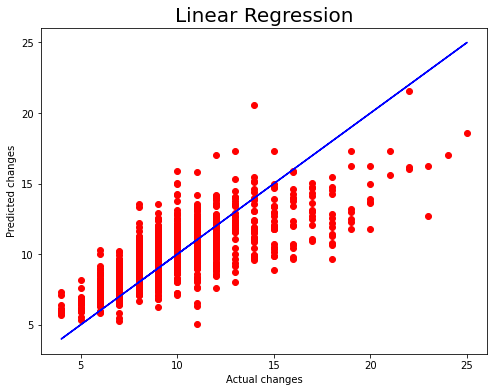

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual changes",fontsize=10)
plt.ylabel("Predicted changes",fontsize=10)
plt.title("Linear Regression",fontsize=20)
plt.savefig("lr.png")
plt.show()

In [53]:
from sklearn.linear_model import Lasso

In [54]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],
           'random_state':list(range(0,10))}

In [55]:
from sklearn.model_selection import GridSearchCV
ls=Lasso()

lf=GridSearchCV(ls,parameters)
lf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [56]:
print(lf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [57]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

In [58]:
ls_score_training*100

49.63895169250977

In [59]:
pred_ls=ls.predict(x_test)

In [60]:
lss=r2_score(y_test,pred_ls)

In [61]:
print(lss*100)

55.30953972649926


# Ensemble technique:

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [63]:
parameter={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

In [64]:
rf=RandomForestRegressor()

clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [65]:
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [66]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("r2 score:",rfs*100)


r2 score: 55.06843966599089


# AdaBoost model training

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
ada=AdaBoostRegressor()

In [69]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [70]:
y_pred=ada.predict(x_train)

In [71]:
from sklearn import metrics
accuracy=metrics.r2_score(y_train,y_pred)

In [72]:
accuracy

0.3229462886008656

In [73]:
y_test_pred=ada.predict(x_test)

In [74]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.31827132022352356

# Hyperparameter tuning using RandomizedSearchCV

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
params={'n_estimators':[47,50,60,70], 'learning_rate':[0.25,0.30,0.40]}

In [77]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [78]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [79]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=47)

In [80]:
ada=AdaBoostRegressor(learning_rate=0.25,n_estimators=50)

ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)

print(metrics.r2_score(y_test,y_pred))

0.39558058819712494


# XGB

In [81]:
!pip3 install xgboost

In [82]:
from xgboost import XGBRegressor
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [83]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [84]:
y_pred1=xgb.predict(x_test)

In [85]:
r2_score(y_test,y_pred1)

0.4945125542391462

# we'll go for the lasso model as it will give the best score 55.30%


In [86]:
import pickle
filename='Rings.pkl'
pickle.dump(ls,open(filename,'wb'))

# Conclusion:

In [88]:
loaded_model=pickle.load(open('Rings.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

55.30953972649926


In [89]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])

In [90]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,994,995,996,997,998,999,1000,1001,1002,1003
Predicted,8.195374,9.063296,11.080529,10.010973,8.904419,13.150423,10.407799,6.871533,9.380692,9.307271,...,9.371307,10.337872,10.092362,9.47921,13.962123,9.072508,14.063998,9.630333,10.801492,7.971179
Original,8.470000,9.240000,12.120000,9.370000,8.770000,14.160000,10.900000,6.790000,9.590000,8.950000,...,9.660000,11.190000,9.810000,9.50000,13.420000,9.770000,12.170000,9.350000,11.730000,7.600000
